***DATASET: FIFA 18 COMPETE PLAYER DATASET*** <br> ***SOURCE: KAGGLE*** <br> ***OBJECTIVE: EVALUATE PREFERRED POSITION***

In [40]:
# Loading the required Python libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [41]:
# Read the entire dataset sourced from Kaggle using Pandas
soccer_df = pd.read_csv("Soccer.csv")
soccer_df.head()

C:\Users\Anil Jacob\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Key,Name,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,392,M. Rashford,19,80,89,93,67,90,78,79,...,74,82,25,92,83,32,73,73,72,RM
1,6491,F. Martin,27,69,69,74,52,72,71,70,...,71,76,25,71,74,47,75,65,71,CM
2,606,A. Kokorin,26,79,81,85,67,82,72,80,...,75,77,44,84,76,42,65,71,71,RW
3,626,D. Drinkwater,27,79,80,67,74,70,78,79,...,80,77,76,69,85,79,76,78,70,CM
4,181,A. Valencia,31,83,83,88,83,75,83,81,...,77,85,77,87,90,83,85,71,70,RB


***EXPLORATORY DATA ANALYSIS***

In [42]:
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 40 columns):
Key                    17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Overall                17981 non-null int64
Potential              17981 non-null int64
Acceleration           17981 non-null int64
Aggression             17981 non-null int64
Agility                17981 non-null int64
Balance                17981 non-null int64
Ball control           17981 non-null int64
Composure              17981 non-null int64
Crossing               17981 non-null int64
Curve                  17981 non-null int64
Dribbling              17981 non-null int64
Finishing              17981 non-null int64
Free kick accuracy     17981 non-null int64
GK diving              17981 non-null int64
GK handling            17981 non-null int64
GK kicking             17981 non-null int64
GK positioning         17981 non-null int64
GK reflexe

In [43]:
soccer_df.describe()

,Key,Age,Overall,Potential,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,8990.000000,25.144541,66.247984,71.190813,64.600578,55.822257,63.342417,63.815528,58.109838,57.896057,...,61.904844,58.302931,55.661031,45.572048,64.832212,63.261109,47.446026,65.291363,53.022691,43.227852
std,5190.811931,4.614272,6.987965,6.102199,14.907052,17.468440,14.791361,14.094377,16.799127,12.926942,...,9.171952,14.922538,17.398559,21.484684,14.637391,15.922908,21.834465,12.617383,14.387566,17.735041
min,0.000000,16.000000,46.000000,46.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,4495.000000,21.000000,62.000000,67.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,...,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,8990.000000,25.000000,66.000000,71.000000,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,...,62.000000,62.000000,59.000000,52.000000,67.000000,66.000000,54.000000,66.000000,55.000000,44.000000
75%,13485.000000,28.000000,71.000000,75.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,17980.000000,47.000000,94.000000,94.000000,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,...,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


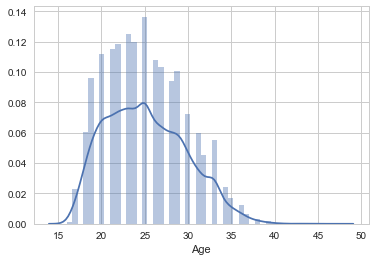

In [44]:
sns.distplot(soccer_df['Age'])

In [45]:
soccer_df.pivot_table(index="Preferred Positions")

,Acceleration,Age,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Preferred Positions,,,,,,,,,,,,,,,,,,,,,
CB,57.188909,25.744547,67.015157,52.913494,55.034381,53.305360,58.890943,40.487985,36.858780,43.953050,...,61.046580,56.347874,50.401479,65.589649,58.939002,64.755638,68.119039,75.717930,41.723105,32.696118
CF,72.482927,25.804878,50.307317,72.341463,71.019512,68.360976,64.429268,57.790244,59.634146,68.809756,...,64.848780,64.551220,66.702439,28.931707,71.341463,64.458537,31.653659,60.609756,62.839024,60.521951
CM,66.376041,25.151924,60.911543,68.080127,69.084094,66.398255,62.803253,56.776676,55.954780,63.459342,...,63.673542,67.635462,63.180484,52.194367,65.976200,68.493852,54.971837,64.001190,62.464498,50.352638
CM,65.560445,24.546282,62.635306,67.003035,68.763784,65.606474,61.762266,55.532119,54.574102,62.531614,...,62.736469,67.987355,62.392514,55.508346,64.658068,69.303490,57.984825,63.632777,61.891249,47.939808
GK,38.897979,26.077378,26.718088,40.682109,43.295712,20.042385,36.533760,14.407097,14.848694,14.046821,...,59.282898,26.916708,22.548053,14.132578,39.306062,30.695416,14.238541,61.046328,36.104978,13.026121
LB,67.518650,25.534636,64.577265,64.346359,64.593250,60.206039,59.726465,58.415631,48.262877,56.751332,...,61.902309,61.149201,55.133215,64.376554,68.502664,69.614565,65.444050,68.083481,49.767318,38.991119
LB,71.750670,25.008043,63.416890,68.001340,68.668901,61.064343,57.994638,63.317694,52.399464,61.194370,...,62.041555,59.632708,53.319035,65.223861,71.676944,71.991957,65.572386,64.180965,50.253351,38.599196
LM,74.830317,24.813725,53.475113,73.971342,72.686275,66.922323,61.093514,62.982655,59.285822,67.853695,...,62.395928,64.294872,63.254148,41.081448,74.335596,67.363499,42.869532,59.564857,60.371041,52.909502
LW,76.268739,24.281536,52.793419,73.756856,72.349177,67.188300,61.652651,61.561243,59.085923,68.184644,...,61.659963,63.235832,63.510055,38.349177,76.034735,66.107861,39.888483,59.793419,59.636197,53.559415


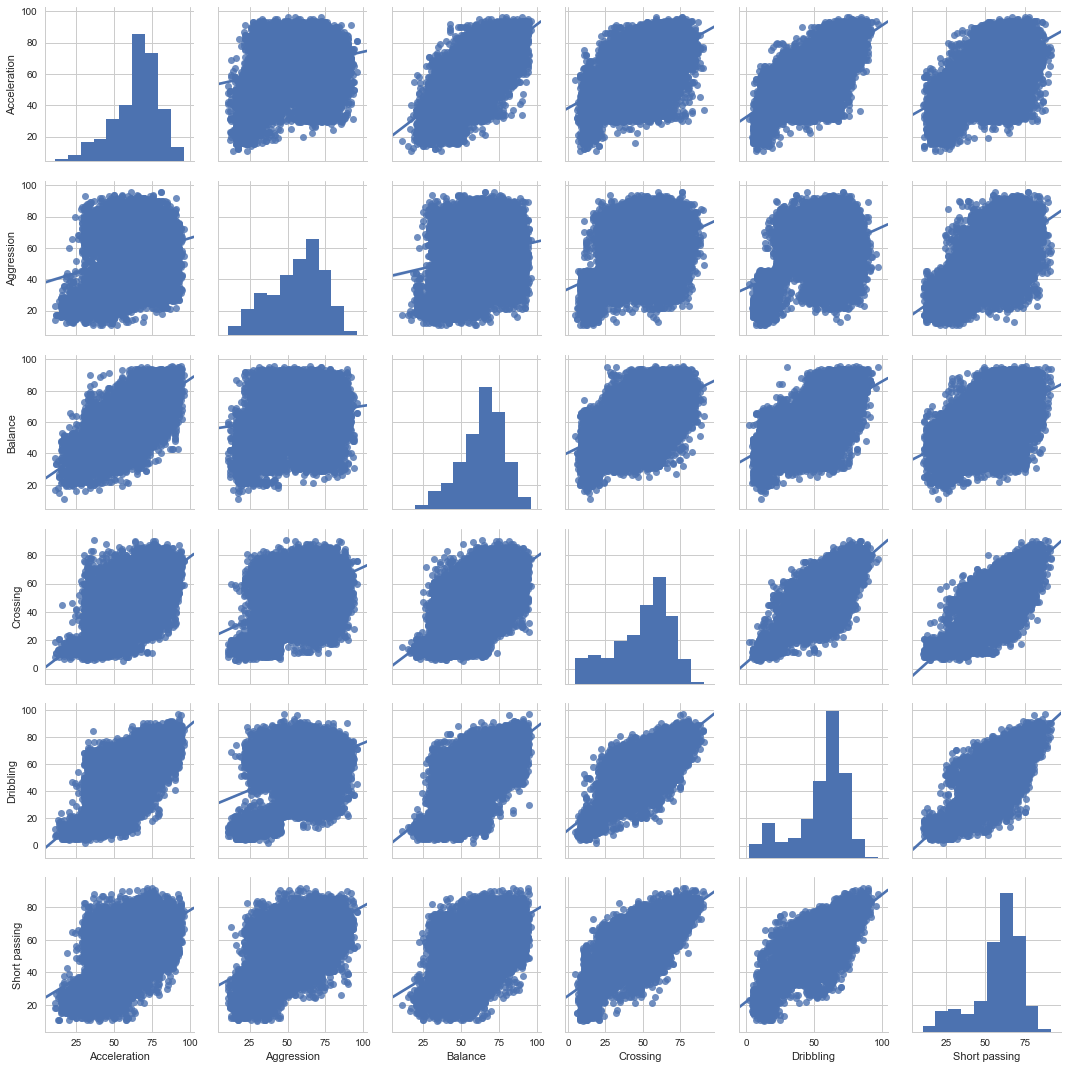

In [46]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(soccer_df[['Acceleration','Aggression','Balance','Crossing','Dribbling','Short passing']], kind='reg')

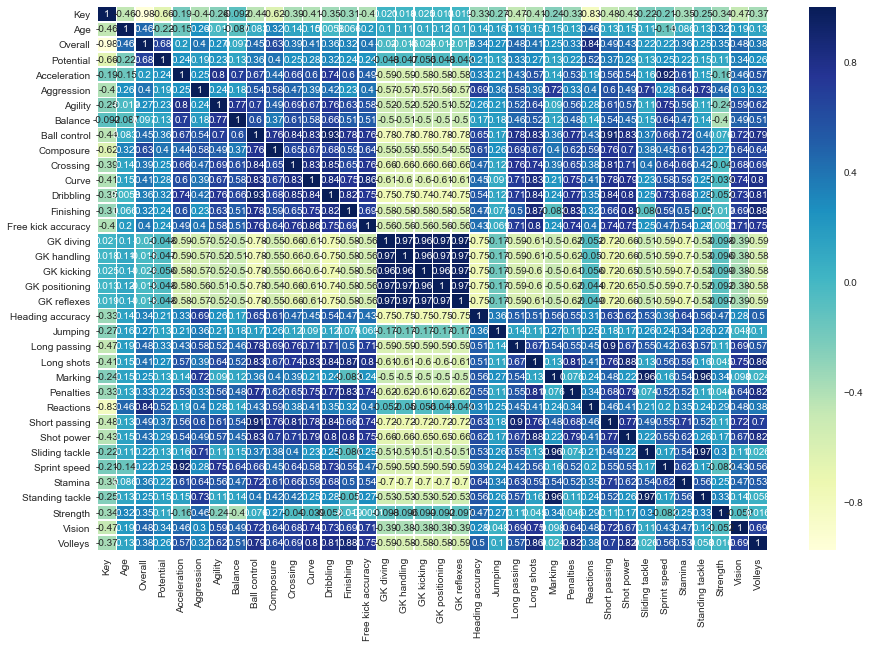

In [47]:
plt.subplots(figsize=(15,10))
sns.heatmap(soccer_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

***AND THE ANALYTICS BEGINS***

In [48]:
numeric_column = ['Acceleration', 'Aggression', 'Ball control', 'Dribbling',
       'Finishing', 'GK reflexes', 'Heading accuracy',
       'Long passing', 'Marking', 'Reactions', 'Short passing',
       'Sprint speed', 'Vision', 'Volleys']

In [49]:
X = soccer_df[numeric_column]
y = soccer_df['Preferred Positions']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1004)

# Check whether the train and test have instances of all the position types
print(np.unique(y_train))
print(np.unique(y_test))

['CB ' 'CF ' 'CM' 'CM ' 'GK ' 'LB' 'LB ' 'LM ' 'LW ' 'RB ' 'RM ' 'RW '
 'ST ']
['CB ' 'CF ' 'CM' 'CM ' 'GK ' 'LB' 'LB ' 'LM ' 'LW ' 'RB ' 'RM ' 'RW '
 'ST ']


In [51]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [52]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc2],
                             ['Decision Tree',sc3],['Random Forest',sc4]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.180984
1,Gradient Boost,0.527384
2,Decision Tree,0.439533
3,Random Forest,0.453433


***CONCLUSIONS***